# CME Project 1

Contributors: Jack Seagrist and Karthik Ramesh

For part one of our project, we have chosen to analyze a data set which contains information on all of the soccer players in Fifa 19. In part one, we will explore the techniques we learned for data exploration which includes: data manipulation and visualization, clustering, and dimensionality reduction.

Specifically in this notebook, we will analyze the statistics between players on the teams Newcastle and Chelsea to see if any significant classification can be achieved.

For reference, we have found a dataset from a Kaggle notebook. The user walks through their own analysis of the dataset in the R programming language.

Citation:https://www.kaggle.com/jaseziv83/clustering-to-help-club-managers



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print('Done')

Done


## 1. Import Data

In [2]:
Filename = 'Fifa_19_data'
Fifa_19 = pd.read_csv(Filename + '.csv')
Fifa_19

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


## 2. Preparing the Data

### Summarizing the data

In [3]:
Fifa_19.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


We can see there is a large number of quantitative values in our dataset, each with very different ranges of potential values. To help us get a clearer picture of the data, we will start to use visualizations.

### Converting 'Value' from String to Integer

For this analysis, we want to compare how the data is distributed for players who are right footed versus players who are left footed. We will start by creating a violinplot for the variables in the table. The first step is to reduce the dataset we are working with to the quantitative variables we wish to analyze.

In [4]:
features = ['Age','Club','Overall', 'Potential', 'Value', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'BallControl', 'SprintSpeed', 'Vision', 'Strength']
sample1 = Fifa_19[features]

The next step completed was to convert the value numbers from a string to an actual numerical value that can be manipulated.

In [5]:
value_num = []
length = sample1.shape[0]

for i in range(length):
  # Get inputs for equation from table
  value = sample1['Value'].iloc[i]

  new_word = ''
  for ch in value:
    if ch.isdigit():
      new_word += ch

  new_word = int(new_word)
  
  M = value.find('M')
  K = value.find('K')
  
  if K == -1:
    final_val = new_word * 1000 #put 1000000 here for normal value
  elif M == -1:
    final_val = new_word * 1 #put 1000 here for normal value

  value_num.append(final_val)

In [6]:
# Joining numerical 'value' values back to main table
value_num = pd.DataFrame(value_num)
sample1 = sample1.join(value_num)

In [7]:
# Renaming joined column
sample1 = sample1.rename(columns={0: 'Value Num [K]'})

## 3. Exploration - Newcastle vs Chelsea

Now with the data ready to go, we want to compare the data between players at Newcastle and Chelsea. To do this, we will take a subset of the features in the dataset to do our analysis. Then we will normalize the data, and create a violin plot to see if there are any significant distinguishing values.

In [19]:
# Filtering for the Newcastle and Chelsea players
sample3 = sample1
sample3 = sample3.loc[sample3['Club'].isin(['Chelsea', 'Newcastle United'])]

In [133]:
# Updating order of features
features4 = ['Age',
 'Overall',
 'Potential',
 'International Reputation',
 'Crossing',
 'Finishing',
 'ShortPassing',
 'Dribbling',
 'BallControl',
 'SprintSpeed',
 'Vision',
 'Strength',
 'Value Num [K]',
 'Club',]

sample3 = sample3[features4]

In [134]:
# Normalizing the data
X2 = sample3.iloc[:,0:-1]
norm2 = (X2 - X2.mean()) / (X2.std())
norm2['Club'] = sample3[['Club']]

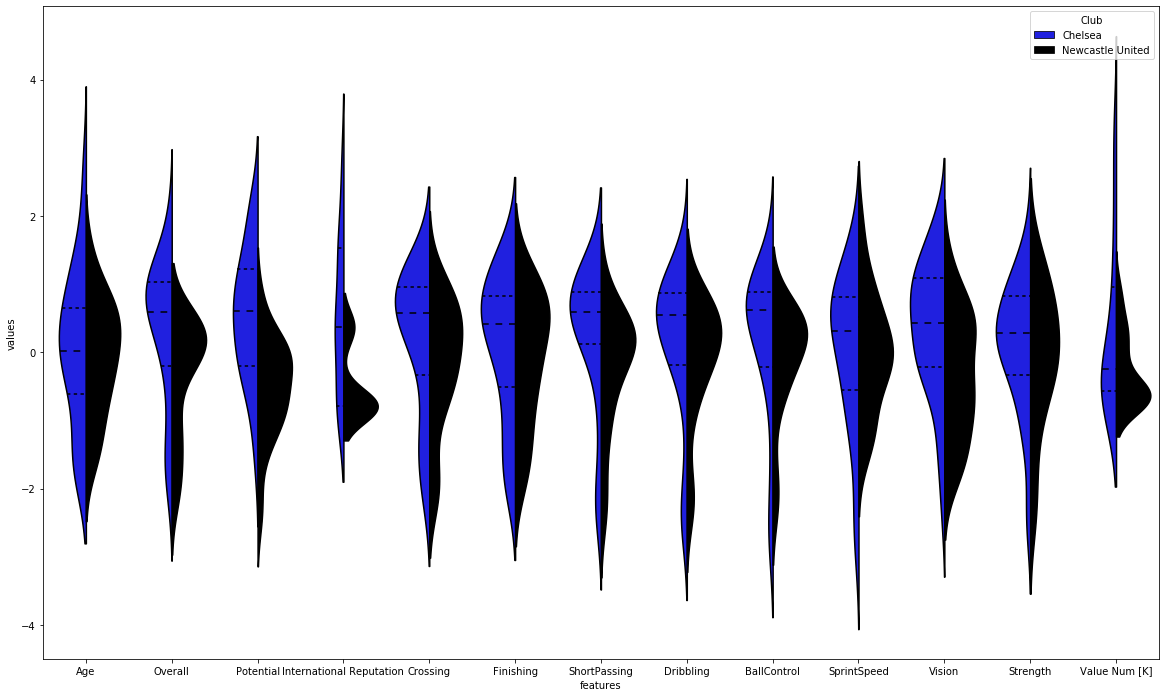

In [135]:
visualization3 = pd.melt(norm2, id_vars=['Club'], var_name='features', value_name='values')

plt.figure(figsize=(20,12))

with sns.axes_style(style=None):
    sns.violinplot('features', 'values', hue='Club', data=visualization3,
                   split=True, inner="quartile", palette=['Blue', 'Black']);

From the plot, we can see that in general the data seems to follow the same distributions between both teams. The players on Chelsea in general have distributions where the average value is slightly higher than Newcastle's players. One exception to this is the Age, where it appears Chelsea's team has a lower average age but wider distribution. The features where there is the biggest discrepancy between the distributions are for Overall, Potential, International Reputation, Vision, and Value. Newcastle's distributions for International Reputation and Value appear to be bimodal, indicating that there is a small subgroup of players within the team who are highly rated and have a greater value. The Overall and Potential ratings of the Chelsea players have much larger ranges, but extend much higher than Newcastle's distribution.

## 4. PCA

The next step was to conduct principal component analysis to reduce the dimensionality of the dataset and use clustering to group the data. For this PCA analysis, we took the features which showed the greatest distinguishing distributions in the violin plot.

In [136]:
#Define 2 components
pca = PCA(n_components=2)

#Compute principal components on features with biggest differentiation
X2 = X2[['Overall', 'Potential', 'International Reputation', 'Vision', 'Value Num [K]']]
X_pc2 = pca.fit(X2).transform(X2)

X_pc2 = pd.DataFrame(X_pc2, columns=['Pc1', 'Pc2'])

In [137]:
#Plot Principal components
index = np.arange(66)
clubs = norm2[['Club']]
clubs = clubs.set_index(index)

X_pc2 = X_pc2.join(clubs)
X_pc2

,Pc1,Pc2,Club
0,39637.806038,-28.493383,Chelsea
1,9637.805343,-20.913511,Chelsea
2,-18362.195171,-17.169598,Chelsea
3,-15362.194398,-28.609978,Chelsea
4,251637.804013,-1.277149,Chelsea
...,...,...,...
61,-53132.198585,12.294147,Newcastle United
62,-53132.198721,14.173926,Newcastle United
63,-53192.198429,8.441447,Newcastle United
64,-53212.199642,24.687552,Chelsea


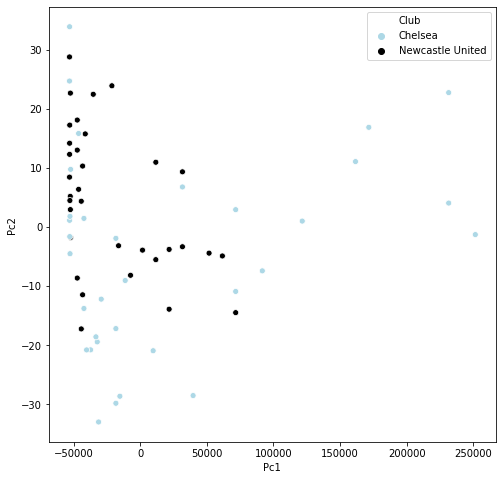

In [138]:
fig = plt.figure(figsize = (8,8))

sns.scatterplot(x = 'Pc1', y = 'Pc2', hue='Club', data=X_pc2, palette=['lightblue', 'Black'])


Looking at the plot, there does not to be any significant grouping of data by teams. Chelsea players appear to have a larger spread of data points, with a few players extending very far out on the PC1 axis.

## 5. Clustering with Kmeans

With the data reduced to two dimensions, we can now use KMeans clustering to group the datapoints. We will be creating two clusters, with the goal of being able to group the data according to team.

In [139]:
# Performing KMeans clustering and adding data to dataframe
data_clusters = KMeans(n_clusters=2).fit_predict(X2 - X2.mean() / (X2.std()))

X_pc2['cluster'] = data_clusters

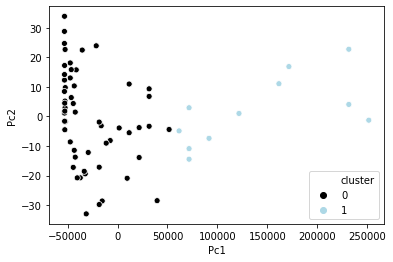

In [140]:
# Plotting data
sns.scatterplot(x= 'Pc1', y='Pc2', hue='cluster', data=X_pc2, palette=['black', 'lightblue'])

In [141]:
clubs_groups = X_pc2.groupby(['Club', 'cluster']).size()
clubs_groups

Club              cluster
Chelsea           0          24
                  1           9
Newcastle United  0          31
                  1           2
dtype: int64

As expected, based on the features selected for the PCA analysis there does not seem to be any significant grouping of players using the KMeans algorithm.